In [181]:
import imgaug as ia
from imgaug import augmenters as iaa

import numpy as np
import pandas as pd
from skimage import io
import configparser
import matplotlib.pyplot as plt
%matplotlib inline

from utils.renderer import *

The purpose of this notebook:
   * Get famliar with imgaug lib
   * augment_images function performs different augmentations for each image in the input array of images if you use sometimes(...) or provide a fraction in certain augmenters.

In [182]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second image.
st = lambda aug: iaa.Sometimes(0.3, aug)

# Define our sequence of augmentation steps that will be applied to every image
# All augmenters with per_channel=0.5 will sample one value _per image_
# in 50% of all cases. In all other cases they will sample new values
# _per channel_.
seq = iaa.Sequential([
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        st(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            #translate_px={"x": (-16, 16), "y": (-16, 16)}, # translate by -16 to +16 pixels (per axis)
            rotate=(-15, 15), # rotate by degrees
            #shear=(-16, 16), # shear by -16 to +16 degrees
            order=ia.ALL, # use any of scikit-image's interpolation methods
            cval=0, # if mode is constant
            mode='constant' # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        ))
    ],
    random_order=True # do all of the above in random order
)



In [183]:
seq = iaa.Affine(
            rotate=90, # rotate by degrees
            order=ia.ALL, # use any of scikit-image's interpolation methods
            cval=0, # if mode is constant
            mode='constant' # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )

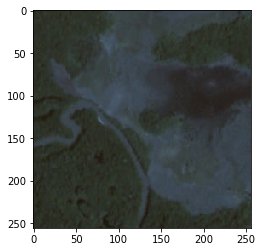

In [184]:
filename = df_train['image_name'][10]

image1 = io.imread(data_dir + 'train-jpg/{}.jpg'.format(filename))

plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

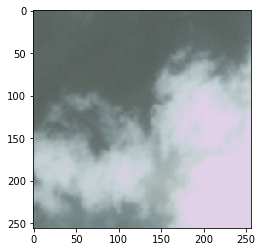

In [185]:
filename = df_train['image_name'][12]

image2 = io.imread(data_dir + 'train-jpg/{}.jpg'.format(filename))
#image = io.imread(data_dir + 'train-tif-v2/{}.tif'.format(filename))

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

(1L, 256L, 256L, 3L)
(1L, 256L, 256L, 3L)
(2L, 256L, 256L, 3L)
(2L, 256L, 256L, 3L)


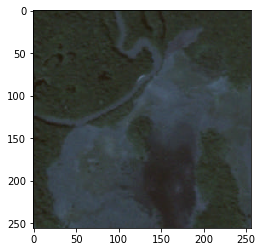

In [186]:
image1= np.expand_dims(image1, axis=0)
print(image1.shape)
image2= np.expand_dims(image2, axis=0)
print(image2.shape)
images = np.vstack((image1, image2))

print(images.shape)

# warning: slow operation
images_aug = seq.augment_images(images)

print(images_aug.shape)

plt.imshow(cv2.cvtColor(images_aug[0], cv2.COLOR_BGR2RGB))



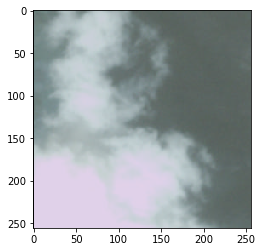

In [187]:
plt.imshow(cv2.cvtColor(images_aug[1], cv2.COLOR_BGR2RGB))